# Project: Describe Health and Sleep Quality Data
## Rubric
### Statistical Analyses
| Criteria | Submission Requirements |
| :--- | :--- |
| Correct Values for All Statistical Results | All statistical numeric values are calculated correctly. |
| Correct Identification of Variable Types | All variable types are correctly identified. |
| Correctly Identify Measures of Center and Measures of Spread | When asked for measures of center, measures of center are provided. When asked for measures of spread, measures of spread are provided. |
| Correctly Plot Distribution of Heart Rates | Plot heart rates and identify possible outliers. |

### Suggestions to Make Your Project Stand Out
Identify how the relationship between the mean and median for different variables provides the shape of the distribution.

Identify multiple measures of center and multiple measures of spread when tasked with each request.

#### Project Instructions
There are four sections of this project that you will need to complete. Below you will find directions to assist with each portion of this project.

#### Data Description

As you inspect the health and sleep quality dataset, notice there are examples of all the data types you are now familiar with.

On this slide, provide an example of each of the following:

____________ is an example of a continuous variable in the dataset.

____________ is an example of an integer variable in the dataset.

____________ is an example of an ordinal categorical variable in the dataset.

____________ is an example of a nominal categorical variable in the dataset.

Notice there are often multiple columns that could fit the category above.

#### Typical Amount (Minutes) of Physical Activity

On this slide, provide the mean, median, and mode number of minutes of physical activity in the dataset.

Standout suggestion: What do the relationships between these values suggest about the skewness of the distribution associated with physical activity?

#### Analysis of Daily Steps Taken

On this slide, provide the standard deviation, maximum, minimum, and range associated with the number of steps taken.

Standout suggestion: Provide any other measures of spread you think might be helpful to understand the dataset.

#### Distribution of Heart Rates

On this slide, include a plot (graph) of the distribution of heart rates. What is the shape of the distribution? Are there any outliers?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/sleep_health_and_lifestyle_dataset.csv')
print(df.columns)
print(df.head())
df.describe()

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30  

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### Data Description

Sleep Duration is an example of a continuous variable in the dataset.

Daily Steps is an example of an integer variable in the dataset. Other examples include Age, Heart Rate, and Physical Activity Level, representing whole number counts.

Quality of Sleep is an example of an ordinal categorical variable in the dataset. It is a rating scale (1-10) where the order matters. Stress Level and BMI Category (Normal < Overweight < Obese) also fit this category.

Gender is an example of a nominal categorical variable in the dataset. Other examples include Occupation and Sleep Disorder, where there are distinct categories with no inherent rank or order.

In [3]:
# Physical Activity
col = 'Physical Activity Level'
print(df[col].describe().round(1))
print(f"Mean:   {df[col].mean():.1f}")
print(f"Median: {df[col].median():.1f}")
print(f"Mode:   {df[col].mode()[0]:.1f}") # take first
print(f"Mode count: {df[col].mode().count()}")

count    374.0
mean      59.2
std       20.8
min       30.0
25%       45.0
50%       60.0
75%       75.0
max       90.0
Name: Physical Activity Level, dtype: float64
Mean:   59.2
Median: 60.0
Mode:   60.0
Mode count: 1


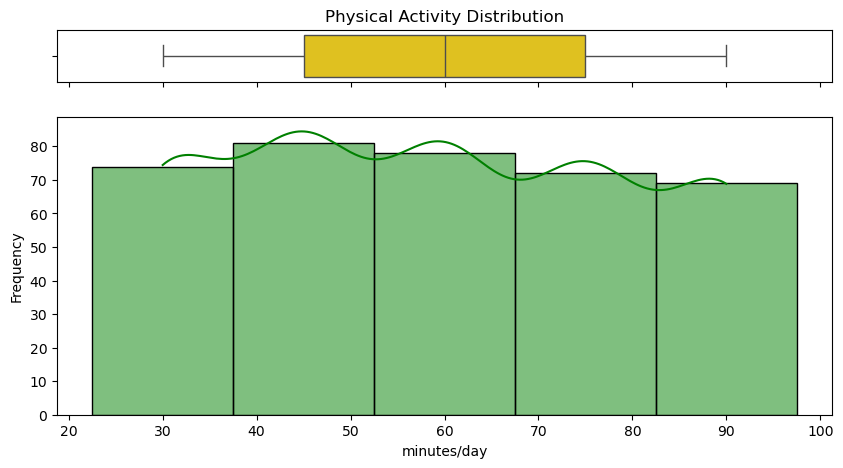

In [4]:
bin_edges = [22.5, 37.5, 52.5, 67.5, 82.5, 97.5]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))

sns.boxplot(x=df['Physical Activity Level'], ax=ax_box, color='gold')
ax_box.set_title(f"Physical Activity Distribution")
ax_box.set(xlabel='')

sns.histplot(df['Physical Activity Level'], bins=bin_edges, kde=True, ax=ax_hist, color='green')
ax_hist.set(xlabel='minutes/day', ylabel='Frequency')

plt.savefig('physical_activity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

The mean (59.2 minutes) is slightly less than the median (60 minutes), which points to a negative/left skew.

However, since the values are quite close to each other (less than a minute difference), the skew is likely very mild, and the distribution is fairly close to symmetric.

Mean: 6816.8
Std:  1617.9
Max:  10000.0
Min:  3000.0
Range: 7000.0


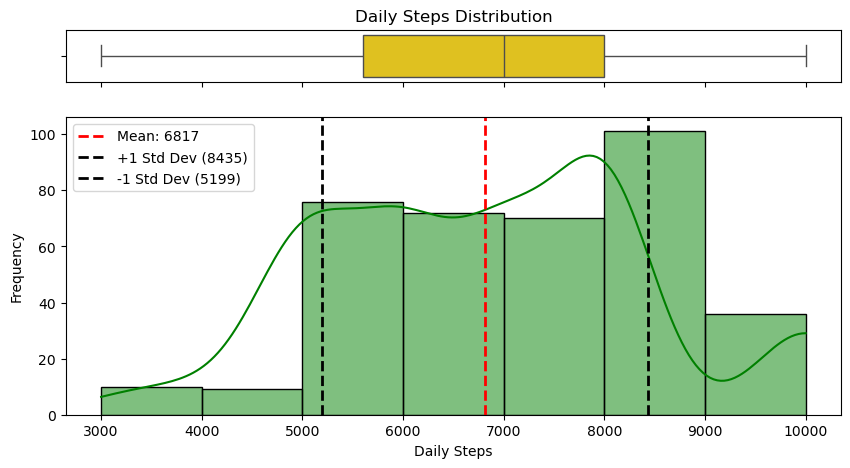

In [5]:
# Analysis of Daily Steps Taken
col = 'Daily Steps'

mean_val = df[col].mean()
std_val = df[col].std()
max_val = df[col].max()
min_val = df[col].min()
range_val = max_val - min_val

print(f"Mean: {mean_val:.1f}")
print(f"Std:  {std_val:.1f}")
print(f"Max:  {max_val:.1f}")
print(f"Min:  {min_val:.1f}")
print(f"Range: {range_val:.1f}")

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))

sns.boxplot(x=df[col], color='gold', ax=ax_box)
ax_box.set_title(f"Daily Steps Distribution")
ax_box.set(xlabel='')

sns.histplot(df[col], kde=True, color='green', binwidth=1000, ax=ax_hist)
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.0f}')
plt.axvline(mean_val + std_val, color='black', linestyle='dashed', linewidth=2, label=f'+1 Std Dev ({mean_val + std_val:.0f})')
plt.axvline(mean_val - std_val, color='black', linestyle='dashed', linewidth=2, label=f'-1 Std Dev ({mean_val - std_val:.0f})')

ax_hist.set_xlabel('Daily Steps')
ax_hist.set_ylabel('Frequency')
ax_hist.legend()
plt.savefig('daily_steps_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Mean: 70.2
Std:  4.1
Max:  86.0
Min:  65.0
Range: 21.0


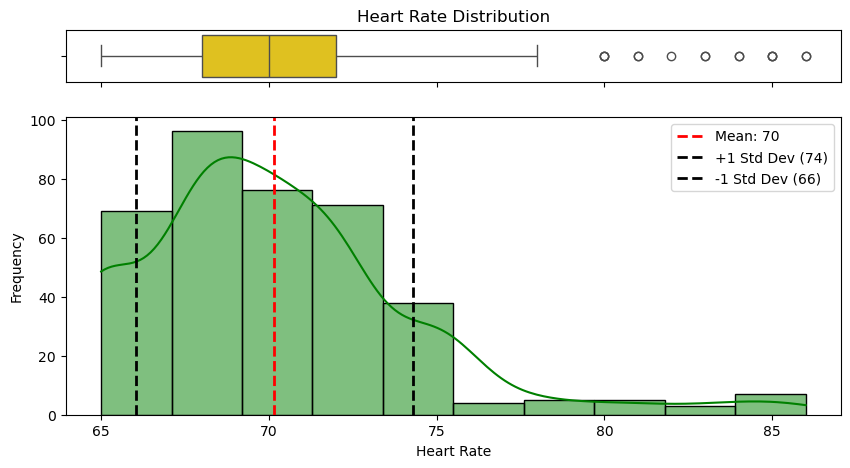

In [6]:
# Distribution of Heart Rates

col = 'Heart Rate'

mean_val = df[col].mean()
std_val = df[col].std()
max_val = df[col].max()
min_val = df[col].min()
range_val = max_val - min_val

print(f"Mean: {mean_val:.1f}")
print(f"Std:  {std_val:.1f}")
print(f"Max:  {max_val:.1f}")
print(f"Min:  {min_val:.1f}")
print(f"Range: {range_val:.1f}")

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))

sns.boxplot(x=df[col], color='gold', ax=ax_box)
ax_box.set_title(f"Heart Rate Distribution")
ax_box.set(xlabel='')

sns.histplot(df[col], kde=True, color='green', binwidth=2, ax=ax_hist)
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.0f}')
plt.axvline(mean_val + std_val, color='black', linestyle='dashed', linewidth=2, label=f'+1 Std Dev ({mean_val + std_val:.0f})')
plt.axvline(mean_val - std_val, color='black', linestyle='dashed', linewidth=2, label=f'-1 Std Dev ({mean_val - std_val:.0f})')

ax_hist.set_xlabel('Heart Rate')
ax_hist.set_ylabel('Frequency')
ax_hist.legend()
plt.savefig('heart_rate_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Calculate Q1, Q3, and IQR
Q1 = df['Heart Rate'].quantile(0.25)
Q3 = df['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Filter the data to find outliers
outliers = df[(df['Heart Rate'] < lower_bound) | (df['Heart Rate'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(f"Outlier values:\n{outliers['Heart Rate'].values}")

Lower Bound: 62.0
Upper Bound: 78.0
Number of outliers: 15
Outlier values:
[85 85 85 82 80 80 81 81 84 84 80 83 83 86 86]


The heart rate distribution is right-skewed and has 15 outliers on the higher end (above 78 bpm).